<a href="https://colab.research.google.com/github/ryoshi007/DepressionIndicator/blob/master/Depression_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load the Data

In [1]:
# importing necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts
import numpy as np # for math and arrays
import pandas as pd # for operation on data
import seaborn as sns # for plotting

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ryoshi007/DepressionIndicator/master/clean_data.csv")
data

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,Total_Count,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,2,16,1,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,2,16,1,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,17,1,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,2,13,1,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,19,1,Secondary Children,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2,36,1,16,1,Primary Children,Extremely Severe
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3,38,1,21,1,Secondary Children,Extremely Severe
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0,4,2,48,2,Elder Adults,Normal
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2,16,2,20,1,Secondary Children,Moderate


In [3]:
print(f'Number of rows/examples and columns in the dataset: {data.shape}')

Number of rows/examples and columns in the dataset: (39775, 20)


In [4]:
# Summary of information on the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Optimistic          39775 non-null  int64 
 1   Motivation          39775 non-null  int64 
 2   Looking-Forward     39775 non-null  int64 
 3   Sadness             39775 non-null  int64 
 4   Interest            39775 non-null  int64 
 5   Existential-Crisis  39775 non-null  int64 
 6   Importance          39775 non-null  int64 
 7   Enjoyment           39775 non-null  int64 
 8   Down-hearted        39775 non-null  int64 
 9   Enthusiasm          39775 non-null  int64 
 10  Worthiness          39775 non-null  int64 
 11  Hopefulness         39775 non-null  int64 
 12  Meaningless         39775 non-null  int64 
 13  Tiredness           39775 non-null  int64 
 14  Total_Count         39775 non-null  int64 
 15  gender              39775 non-null  int64 
 16  age                 39

# Cleaning the Data

In [5]:
data.drop("Age_Groups", inplace=True, axis=1)

In [6]:
print("Display NA values in each columns: ")
data.isna().sum(axis = 0)

Display NA values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
Total_Count           0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [7]:
print("Display NULL values in each columns: ")
data.isnull().sum()

Display NULL values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
Total_Count           0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data = data.sample(frac = 1) # Randomly shuffle the rows to make sure data is not sorted

# Embedding the Label

In [10]:
# Convert label from non-numerical value to numerical value
data = data.replace("Normal", 1)
data = data.replace("Mild", 2)
data = data.replace("Moderate", 3)
data = data.replace("Severe", 4)
data = data.replace("Extremely Severe", 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39775 entries, 16161 to 28887
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Optimistic          39775 non-null  int64
 1   Motivation          39775 non-null  int64
 2   Looking-Forward     39775 non-null  int64
 3   Sadness             39775 non-null  int64
 4   Interest            39775 non-null  int64
 5   Existential-Crisis  39775 non-null  int64
 6   Importance          39775 non-null  int64
 7   Enjoyment           39775 non-null  int64
 8   Down-hearted        39775 non-null  int64
 9   Enthusiasm          39775 non-null  int64
 10  Worthiness          39775 non-null  int64
 11  Hopefulness         39775 non-null  int64
 12  Meaningless         39775 non-null  int64
 13  Tiredness           39775 non-null  int64
 14  Total_Count         39775 non-null  int64
 15  gender              39775 non-null  int64
 16  age                 39775 non-null  

# Split the data into train / test splits

In [12]:
# Split the data into 60% train and 40% test
train_dataset, temp_test_dataset = train_test_split(data, test_size=0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(23865, 19)
(15910, 19)


In [13]:
# Split the temp_test_dataset dataframe to 50% test and 50% cross-validation
# Hence, the dataset is splitted into 60% train, 20% cross-validate and 20% test
test_dataset, cross_valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(cross_valid_dataset.shape)

(7955, 19)
(7955, 19)


In [14]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset           : {train_dataset.shape}")
print(f"Cross-Validation dataset: {test_dataset.shape}")
print(f"Test dataset            : {cross_valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset           : (23865, 19)
Cross-Validation dataset: (7955, 19)
Test dataset            : (7955, 19)


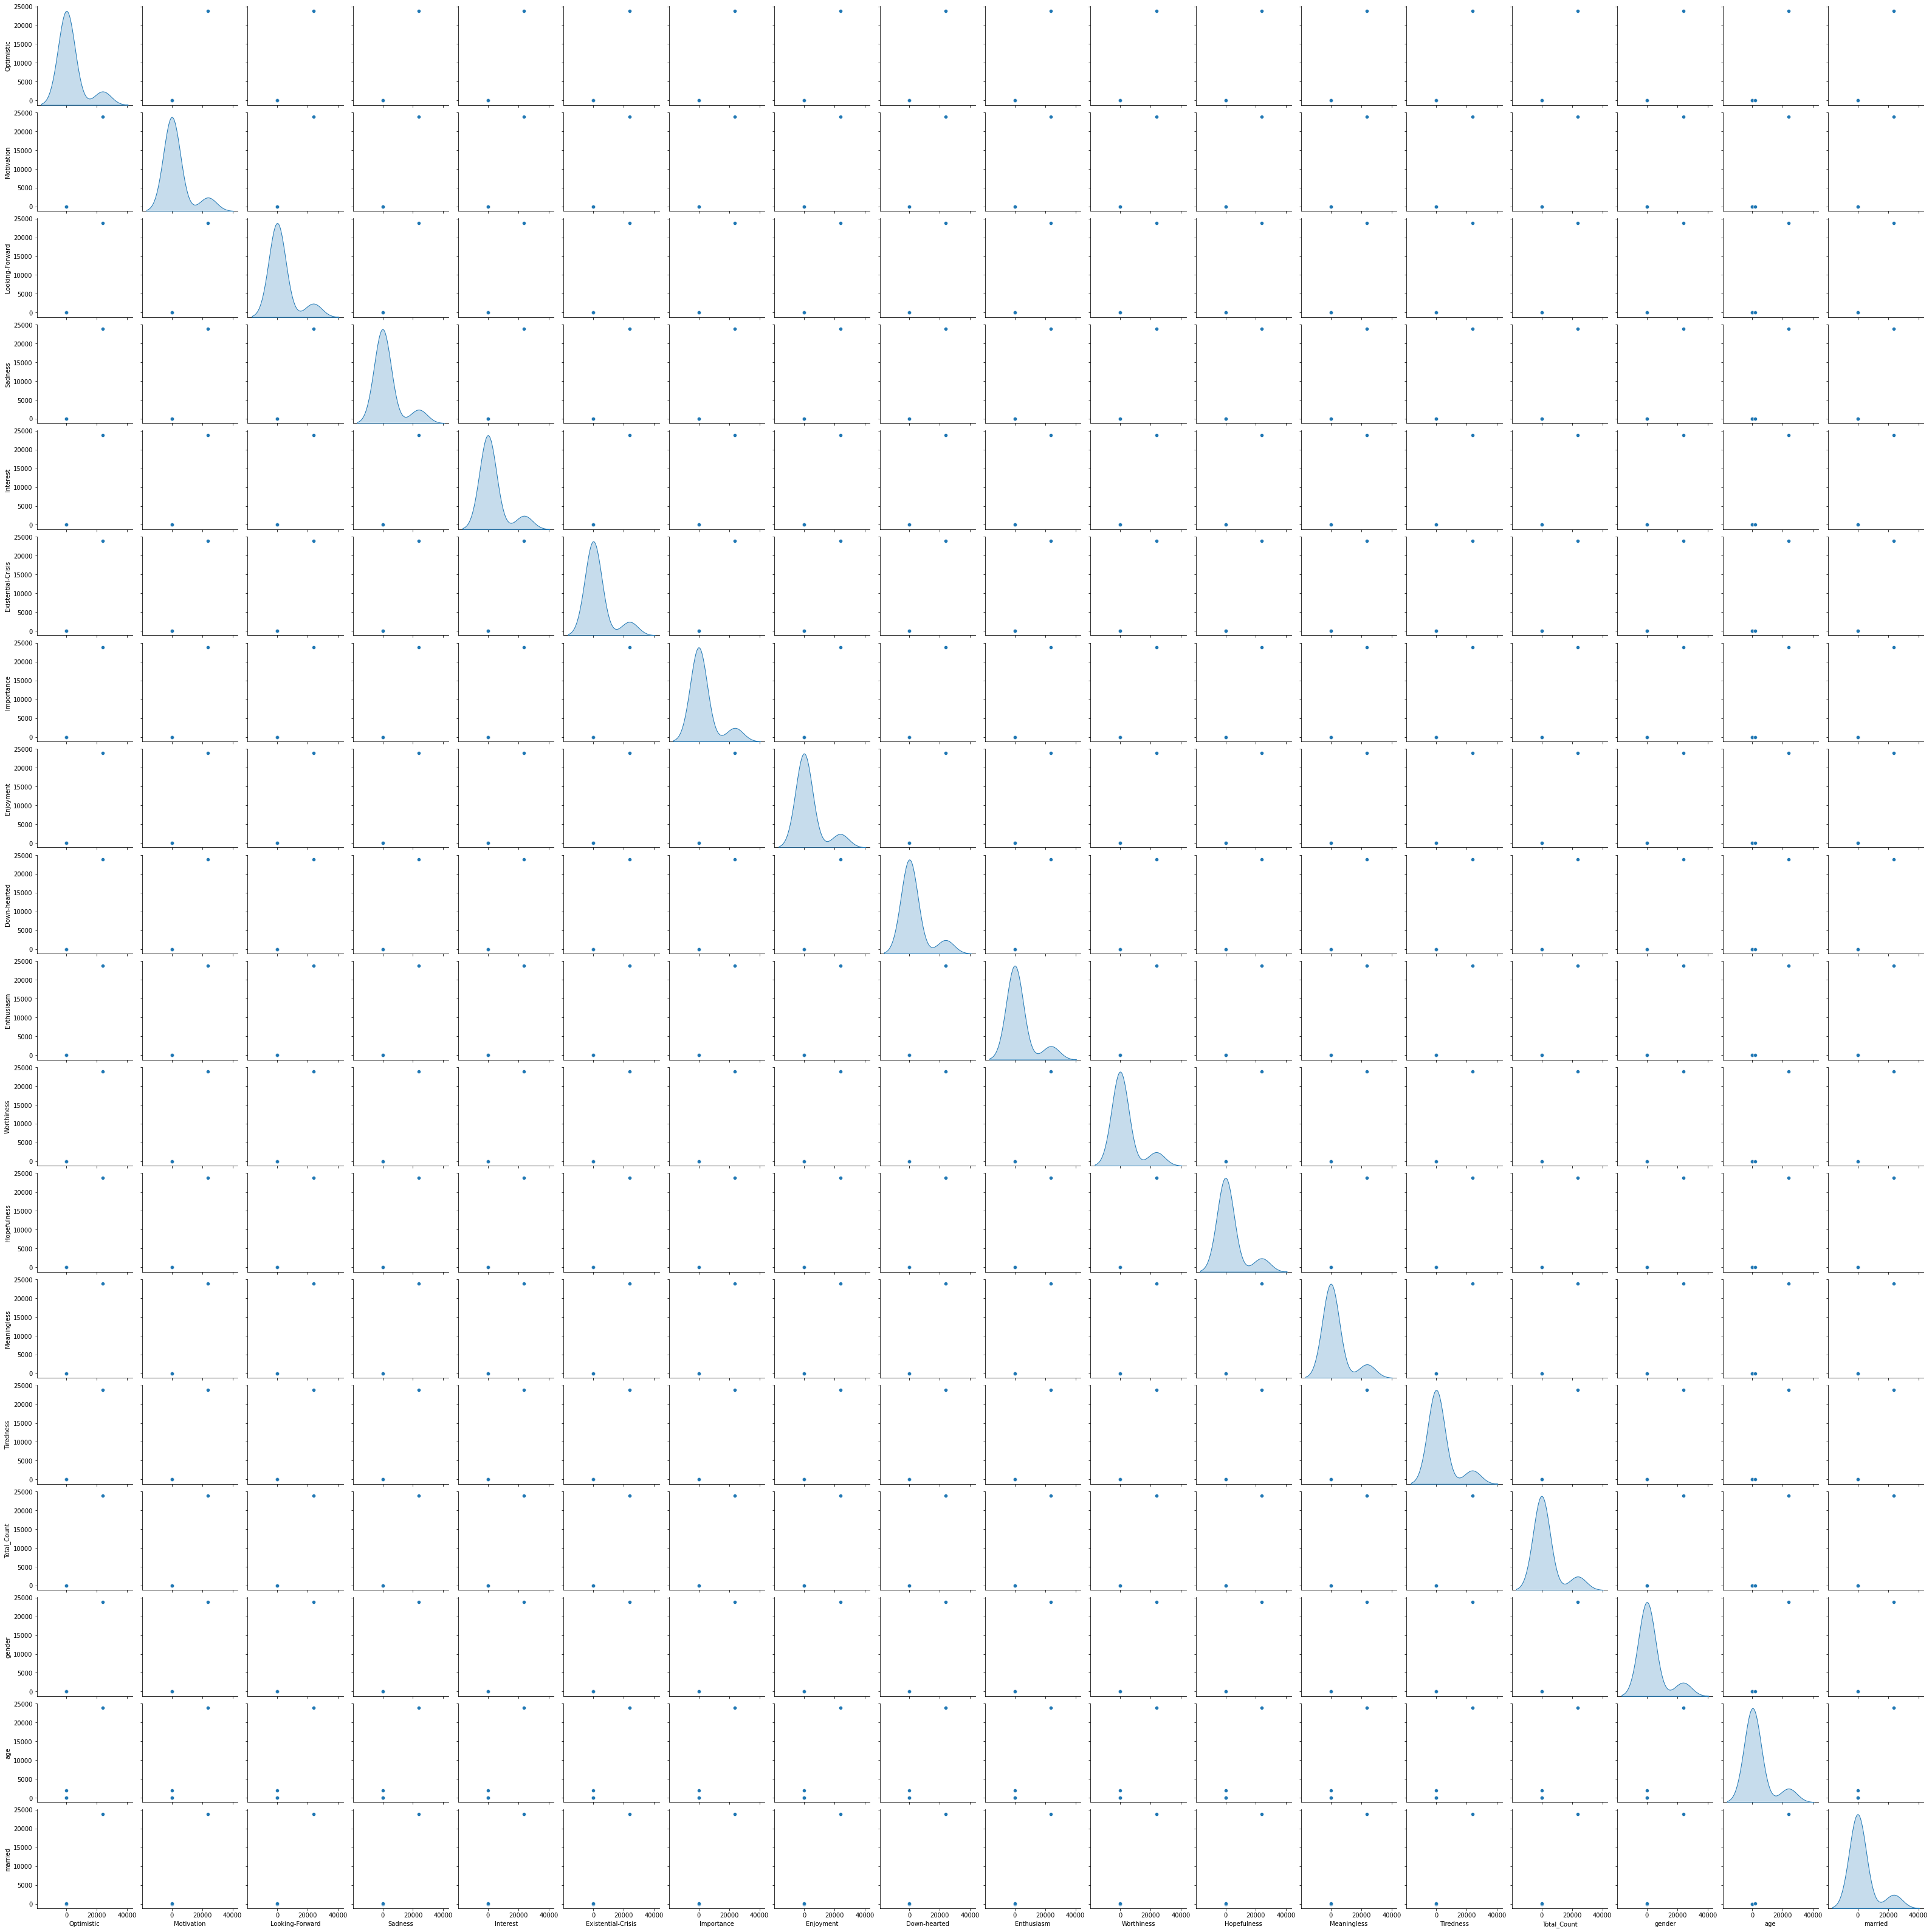

In [15]:
# Plot the relationship between each two variables to spot anything incorrect
train_stats = train_dataset.describe()
train_stats.pop("Condition")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [16]:
# Statistics on the train dataset to make sure it is in a good shape
train_stats = train_dataset.describe()
train_stats.pop("Condition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Optimistic,23865.0,1.231301,1.040844,0.0,0.0,1.0,2.0,3.0
Motivation,23865.0,1.520176,1.066521,0.0,1.0,1.0,2.0,3.0
Looking-Forward,23865.0,1.452043,1.139553,0.0,0.0,1.0,3.0,3.0
Sadness,23865.0,1.787597,1.072004,0.0,1.0,2.0,3.0,3.0
Interest,23865.0,1.517536,1.110794,0.0,1.0,1.0,3.0,3.0
Existential-Crisis,23865.0,1.662099,1.156342,0.0,1.0,2.0,3.0,3.0
Importance,23865.0,1.357343,1.165211,0.0,0.0,1.0,2.0,3.0
Enjoyment,23865.0,1.435827,1.053624,0.0,1.0,1.0,2.0,3.0
Down-hearted,23865.0,1.661638,1.064913,0.0,1.0,2.0,3.0,3.0
Enthusiasm,23865.0,1.373811,1.044161,0.0,1.0,1.0,2.0,3.0


In [17]:
# Obtain the label
train_labels = train_dataset.pop("Condition")
test_labels = test_dataset.pop("Condition")
cross_valid_labels = cross_valid_dataset.pop("Condition")

# Data Normalization / Scaling

In [18]:
# Define a function to normalize the dataset
# Subtract the mean of the training data and divide by the standard deviaion of the training data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_cross_valid_data = norm(cross_valid_dataset)

In [19]:
# Show a sample of the data after normalized
normed_train_data.head(10)

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,Total_Count,gender,age,married
21115,0.738534,0.449896,1.358389,1.130969,1.334598,1.157012,1.409750,0.535460,0.317736,1.557413,0.318411,1.429277,1.354081,1.280471,1.292699,0.466332,-0.025142,-0.376444
24834,-0.222225,-0.487731,0.480853,-0.734696,-0.465916,-0.572581,-0.306677,0.535460,-0.621307,-0.358001,-0.552320,-0.330769,0.510366,-0.653730,-0.331358,0.466332,0.059117,-0.376444
15975,-0.222225,0.449896,0.480853,1.130969,0.434341,0.292215,0.551536,0.535460,0.317736,1.557413,0.318411,0.549254,1.354081,0.313371,0.724279,0.466332,-0.109401,-0.376444
1465,-0.222225,-0.487731,-0.396684,0.198136,-0.465916,-0.572581,-0.306677,-1.362751,-0.621307,-0.358001,0.318411,-1.210792,0.510366,-0.653730,-0.493764,2.742667,-0.404307,-0.376444
23057,-0.222225,0.449896,0.480853,0.198136,0.434341,0.292215,-1.164890,-0.413645,-1.560351,-0.358001,0.318411,-0.330769,-1.177066,-0.653730,-0.331358,0.466332,0.227635,-0.376444
2876,-1.182983,-1.425359,-1.274221,0.198136,-1.366172,-0.572581,-1.164890,-1.362751,-0.621307,-0.358001,0.318411,-0.330769,-1.177066,-0.653730,-0.980981,0.466332,-0.320048,-0.376444
28871,-0.222225,-1.425359,-1.274221,-1.667528,-1.366172,-1.437378,-1.164890,-1.362751,-1.560351,-1.315709,-1.423051,-1.210792,-1.177066,-1.620830,-1.630604,0.466332,0.438282,4.038214
28770,-0.222225,0.449896,1.358389,0.198136,0.434341,0.292215,-0.306677,-0.413645,0.317736,0.599706,-0.552320,-0.330769,-0.333350,0.313371,0.155859,-1.810004,-0.362177,4.038214
18801,-0.222225,-1.425359,-1.274221,0.198136,-1.366172,-1.437378,-1.164890,-1.362751,0.317736,-1.315709,-0.552320,-1.210792,-1.177066,-1.620830,-1.224590,0.466332,-0.067271,-0.376444
25993,-0.222225,0.449896,0.480853,1.130969,0.434341,-0.572581,0.551536,0.535460,0.317736,0.599706,-0.552320,1.429277,0.510366,0.313371,0.480671,0.466332,0.143376,-0.376444


# Training the Model

In [26]:
# Create a svm classifier
model = svm.SVC(C = 1, # regularization parameter
                kernel = 'rbf', #kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf'
                )

# Train the model using the training sets
model.fit(normed_train_data, train_labels)

# Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [21]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print("predicted values:")
example_result

predicted values:


array([5, 5, 3, 4, 3, 3, 5, 5, 1, 1])

# See How the Training Went

In [27]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9997904881625812


In [28]:
y_pred = model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9973601508485229


In [29]:
y_pred = model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9984915147705845


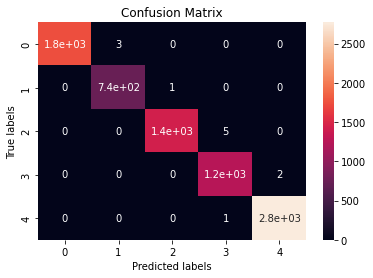

In [30]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(test_labels, predict_results)
sns.heatmap(cm, annot=True, ax=ax); # annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


# Save the Model for Later Use


In [32]:
filename = "depression_model.sav"
import pickle as pk

pk.dump(model, open(filename, 'wb'))

In [33]:
# Test for the accuracy of the saved model
loaded_model = pk.load(open(filename, 'rb'))

y_pred = loaded_model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred)) 

Accuracy: 0.9997904881625812


In [34]:
y_pred = loaded_model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9973601508485229


In [35]:
y_pred = loaded_model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9984915147705845
